# Kinase inhibitors - approved or in clinical trials
This notebook extracts all kinase inhibitors that are in clinical trials or on the market.

In [1]:
import pandas as pd # Import pandas
import pylab
import numpy as np
import matplotlib.pyplot as plt
import rdkit.Chem as Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration

##### Load the drug data downloaded from [ChEMBL](https://www.ebi.ac.uk/chembl/drugstore)

In [2]:
dataframe = pd.read_csv('chembl_drugs.txt', delimiter='\t')

In [3]:
dataframe.columns

Index([u'PARENT_MOLREGNO', u'CHEMBL_ID', u'SYNONYMS', u'DEVELOPMENT_PHASE', u'RESEARCH_CODES', u'APPLICANTS', u'USAN_STEM', u'USAN_STEM_DEFINITION', u'USAN_STEM_SUBSTEM', u'USAN_YEAR', u'FIRST_APPROVAL', u'ATC_CODE', u'ATC_CODE_DESCRIPTION', u'INDICATION_CLASS', u'SC_PATENT_NO', u'DRUG_TYPE', u'RULE_OF_FIVE', u'FIRST_IN_CLASS', u'CHIRALITY', u'PRODRUG', u'ORAL', u'PARENTERAL', u'TOPICAL', u'BLACK_BOX', u'AVAILABILITY_TYPE', u'CANONICAL_SMILES'], dtype='object')

Quick look

In [4]:
dataframe[['DEVELOPMENT_PHASE', 'USAN_STEM', 'USAN_STEM_DEFINITION', 'USAN_STEM_SUBSTEM', 'INDICATION_CLASS', 'DRUG_TYPE']].head()

,DEVELOPMENT_PHASE,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,INDICATION_CLASS,DRUG_TYPE
0,NaN,NaN,NaN,NaN,NaN,Oligopeptide
1,NaN,perflu-,blood substitutes and/or diagnostics (perfluorochemicals),perflu-,NaN,Unknown
2,NaN,NaN,NaN,NaN,NaN,Unknown
3,NaN,NaN,NaN,NaN,NaN,Unknown
4,4,-trop-,atropine derivatives,-trop-,Gonad-Stimulating Principle,Unknown


### Define [USAN stems](http://www.ama-assn.org/ama/pub/physician-resources/medical-science/united-states-adopted-names-council/naming-guidelines/approved-stems.page?) for kinase inhibitors

| STEM | what | example |
| ------------- |-------------| -----|
| -ciclib  | cyclin dependent kinase inhibitors (formerly -cidib)  | seliciclib |
| -mapimod  | mitogen-activated protein (MAP) kinase inhibitors  | dormapimod |
| -lisib  | phosphatidylinositol 3-kinase (PI3K) inhibitors  | pictilisib |
| -rafenib  | rapidly accelerated fibrosarcoma (RAF) kinase  | inhibitors sorafenib |
| -sertib  | serine/threonine kinase inhibitors  | danusertib |
| -tinib  | tyrosine kinase inhibitors   | erlotinib |
| -brutinib  | tyrosine kinase inhibitors Bruton's (Btk) inhibitors  | ibrutinib |
| -citinib  | tyrosine kinase inhibitors; janus kinase inhibitors  | baricitinib |
| -metinib  | tyrosine kinase inhibitors; MEK (MAP kinase) inhibitors  | binimetinib |
| -rolimus | immunosuppressant, rapamycin derivatives | sirolimus |
| -anib | angiogenesis inhibitors | Pazopanib |

In [5]:
def iskininh(x, y):
    """
    If stem found in string it returns true
    """
    stems = ["ciclib", "mapimod", "lisib", "rafenib", "sertib", "tinib", "brutinib", "citinib", "metinib", "rolimus", "anib"]
    for stem in stems:
        # check USAN_STEM
        if stem in str(x):
            return True
        # check USAN_STEM_SUBSTEM
        elif stem in str(y):
            return True
    return False

Tag rows with kinase inhibitors

In [6]:
dataframe['iskininh'] = dataframe.apply(lambda x: iskininh(x['USAN_STEM'],x['USAN_STEM_SUBSTEM']), axis=1)

Create a new data frame with only kinase inhibitors

In [7]:
nibs = dataframe[dataframe['iskininh'] == True]

In [8]:
len(nibs)

124

In [9]:
nibs = nibs[nibs['CANONICAL_SMILES'].notnull()]

Add RDKit molecule objects to data frame

In [10]:
PandasTools.AddMoleculeColumnToFrame(nibs, smilesCol='CANONICAL_SMILES')

Remove oligonucleotides

In [11]:
nibs = nibs[nibs['DRUG_TYPE'] != 'Oligonucleotide']

Get only INN name

In [12]:
def innname(x):
    return x.split(' ')[0]

In [13]:
nibs['INN_NAME'] = nibs['SYNONYMS'].map(innname)

### Show all kinase inhibitors

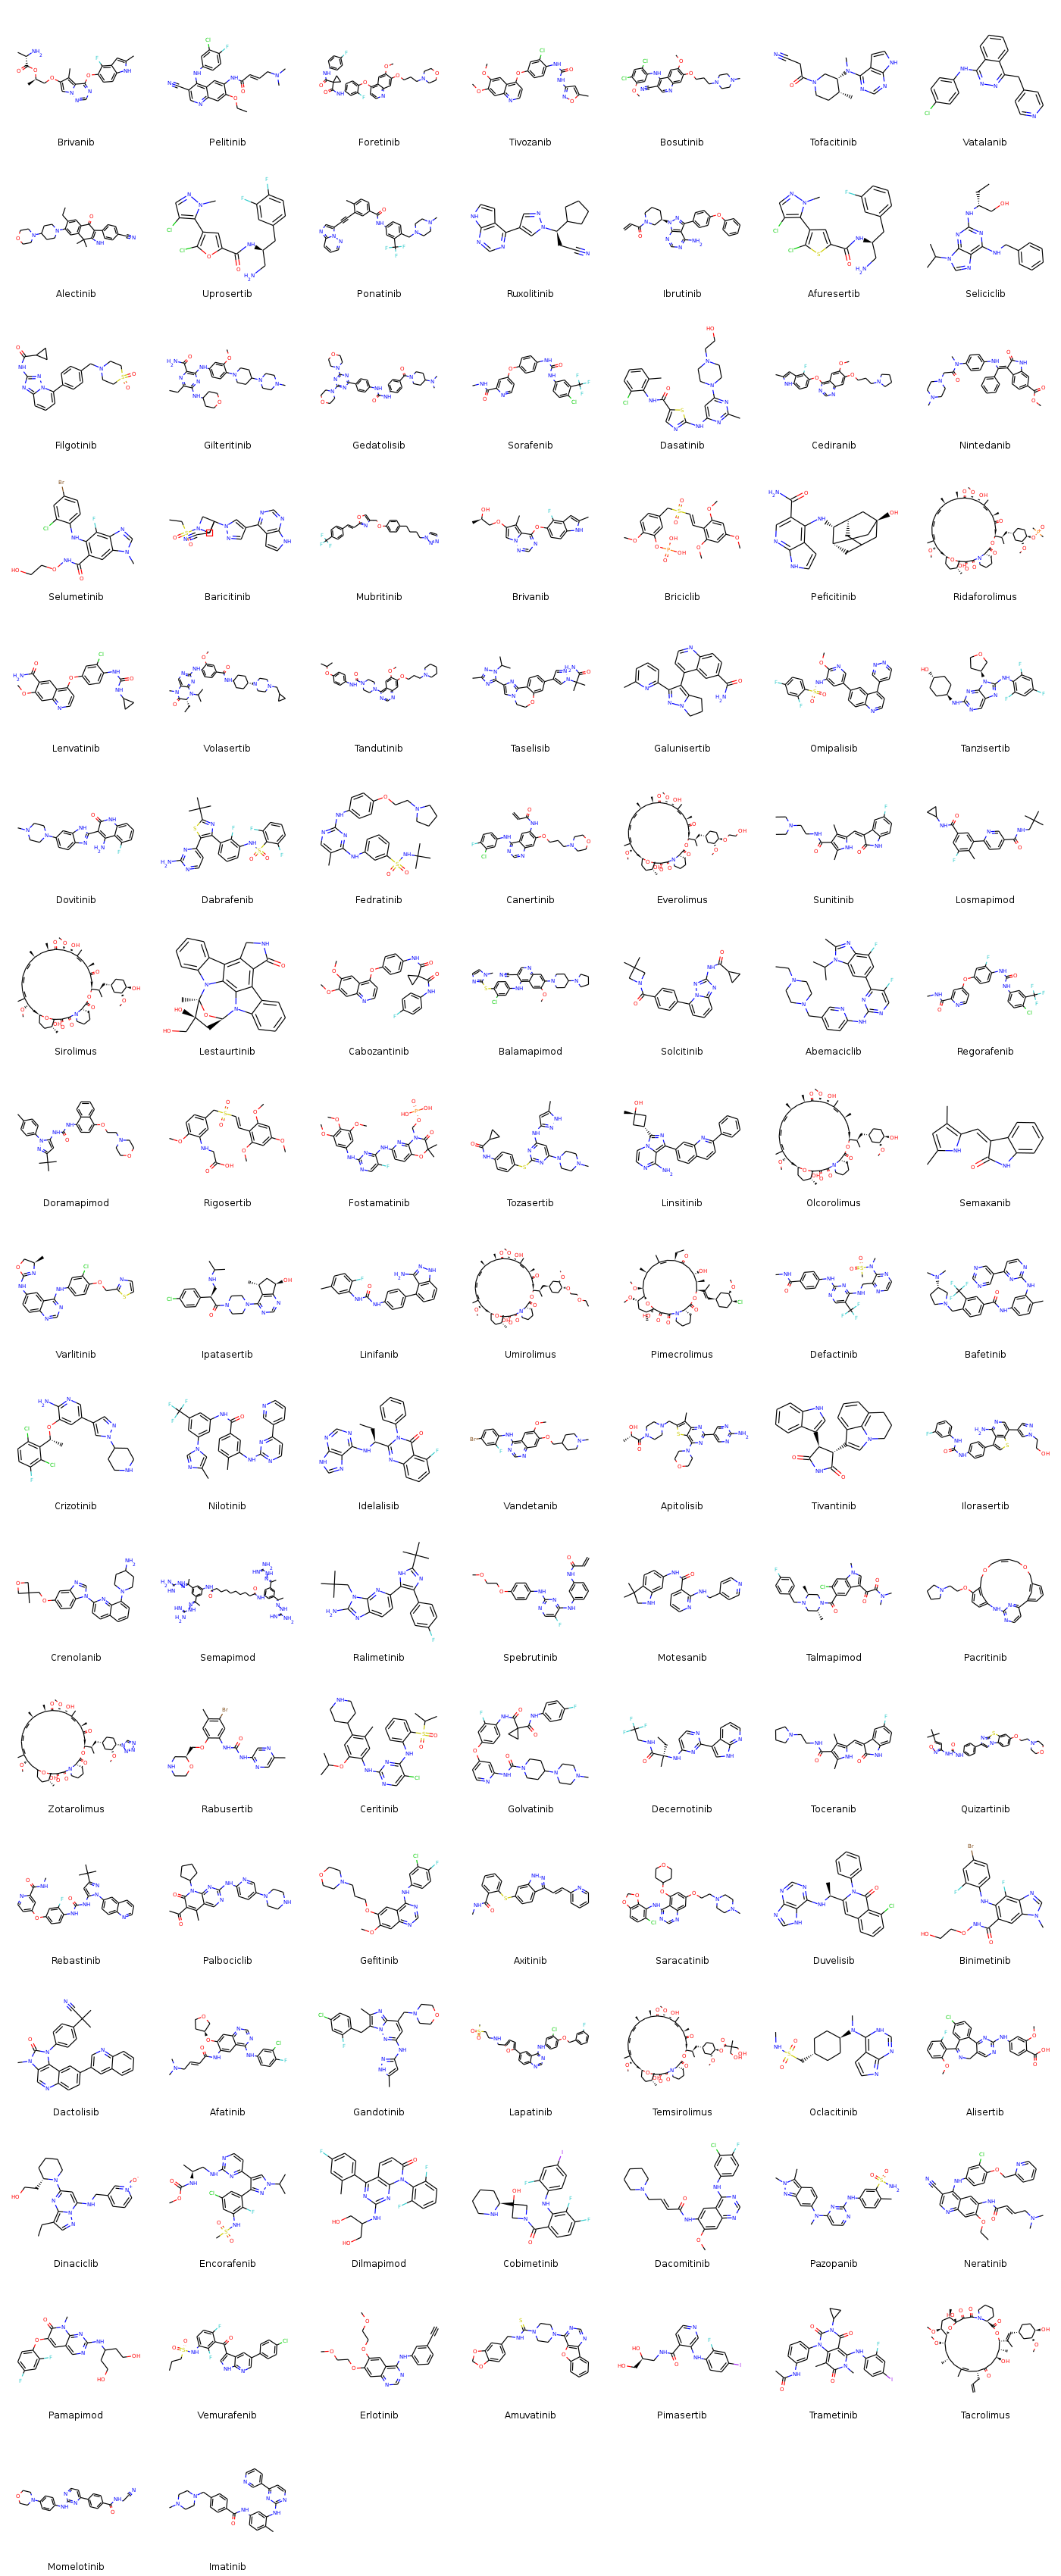

In [14]:
PandasTools.FrameToGridImage(nibs, legendsCol='INN_NAME', molsPerRow=7)

### Show only kinase inhibitors in phase 4 (drugs)

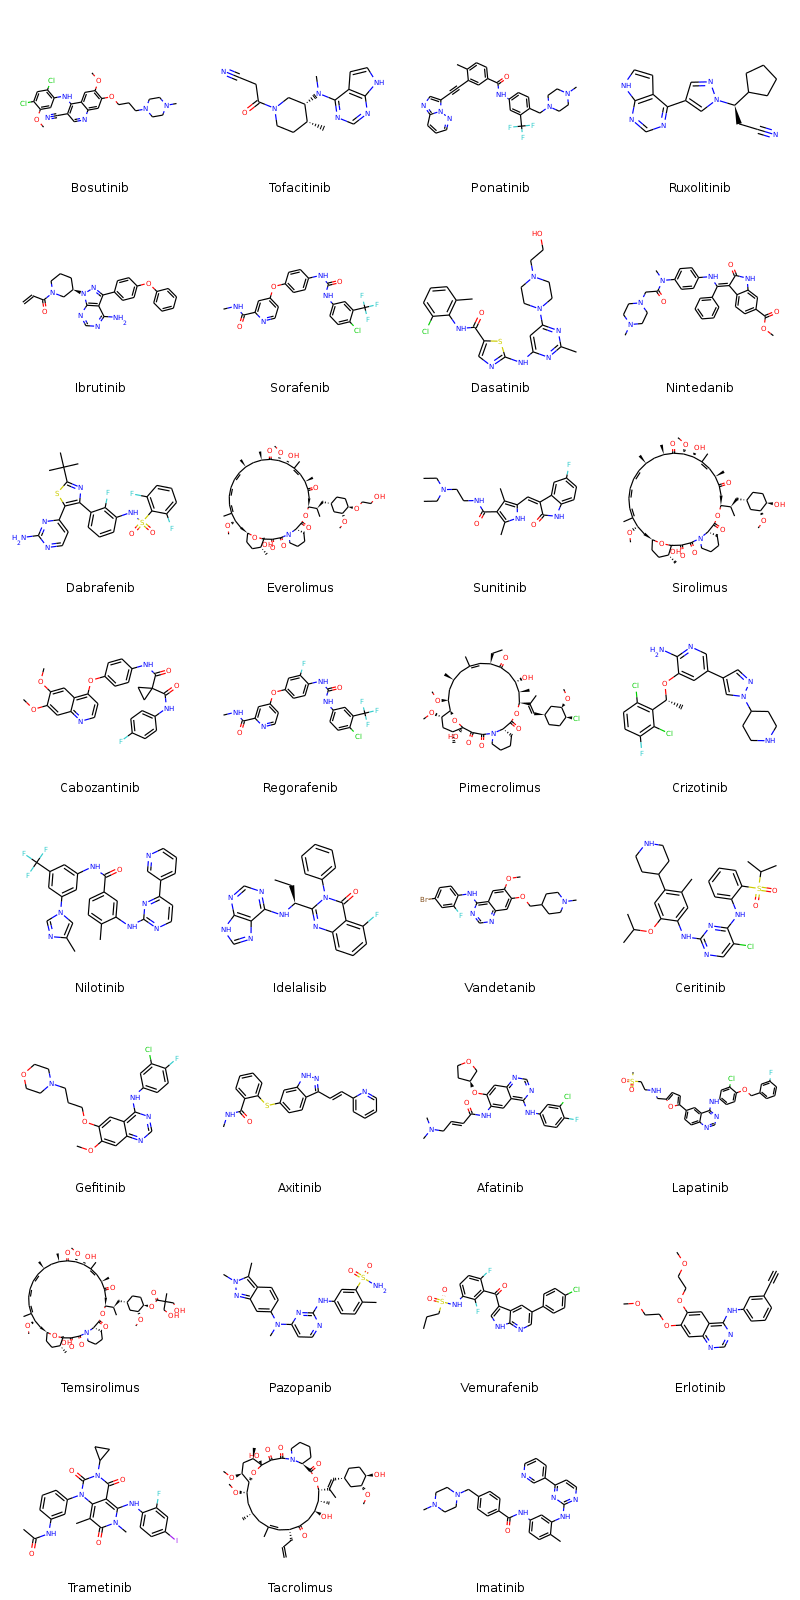

In [15]:
PandasTools.FrameToGridImage(nibs[nibs['DEVELOPMENT_PHASE'] == 4], legendsCol='INN_NAME', molsPerRow=4)

#### List phase 4 kinase inhibitors

In [16]:
", ".join(sorted(list(nibs[nibs['DEVELOPMENT_PHASE'] == 4]['INN_NAME'])))

'Afatinib, Axitinib, Bosutinib, Cabozantinib, Ceritinib, Crizotinib, Dabrafenib, Dasatinib, Erlotinib, Everolimus, Gefitinib, Ibrutinib, Idelalisib, Imatinib, Lapatinib, Nilotinib, Nintedanib, Pazopanib, Pimecrolimus, Ponatinib, Regorafenib, Ruxolitinib, Sirolimus, Sorafenib, Sunitinib, Tacrolimus, Temsirolimus, Tofacitinib, Trametinib, Vandetanib, Vemurafenib'

### How many kinase inhibitors and how many in phase 4

In [17]:
len(nibs), len(nibs[nibs['DEVELOPMENT_PHASE'] == 4])

(114, 31)

##### Save SMILES

In [18]:
PandasTools.SaveSMILESFromFrame(nibs, 'kin_inh.smi', NamesCol='INN_NAME')

In [19]:
PandasTools.SaveSMILESFromFrame(nibs[nibs['DEVELOPMENT_PHASE'] == 4], 'kin_inh_approved.smi', NamesCol='INN_NAME')

#####Save csv

In [20]:
nibs.drop(['ROMol'], axis=1).to_csv('kin_inh.csv')

In [21]:
nibs.drop(['ROMol'], axis=1).tail(5)

,PARENT_MOLREGNO,CHEMBL_ID,SYNONYMS,DEVELOPMENT_PHASE,RESEARCH_CODES,APPLICANTS,USAN_STEM,USAN_STEM_DEFINITION,USAN_STEM_SUBSTEM,USAN_YEAR,FIRST_APPROVAL,ATC_CODE,ATC_CODE_DESCRIPTION,INDICATION_CLASS,SC_PATENT_NO,DRUG_TYPE,RULE_OF_FIVE,FIRST_IN_CLASS,CHIRALITY,PRODRUG,ORAL,PARENTERAL,TOPICAL,BLACK_BOX,AVAILABILITY_TYPE,CANONICAL_SMILES,iskininh,INN_NAME
10036,1380102,CHEMBL2107832,"Pimasertib (INN, USAN)",NaN,NaN,Emd Serono,-sertib,serine/threonine kinase inhibitors,-sertib,2012,NaN,NaN,NaN,NaN,NaN,Synthetic Small Molecule,Y,N,Single Stereoisomer,N,NaN,NaN,NaN,NaN,NaN,OC[C@@H](O)CNC(=O)c1ccncc1Nc2ccc(I)cc2F,True,Pimasertib
10166,1376145,CHEMBL2103875,"Trametinib (INN, USAN); Trametinib Dimethyl Sulfoxide (FDA, USAN)",4,GSK1120212; GSK1120212B,GlaxoSmithKline,-tinib,tyrosine kinase inhibitors,-tinib,2011,2013,L01XE25,L01XE25 [Antineoplastic And Immunomodulating Agents:Antineoplastic Agents:Other Antineoplastic Agents:Protein kinase inhibitors],NaN,US-7378423-B2,Synthetic Small Molecule,N,N,Achiral Molecule,N,Y,N,N,N,Prescription-only,CN1C(=O)C(=C2N(C(=O)N(C3CC3)C(=O)C2=C1Nc4ccc(I)cc4F)c5cccc(NC(=O)C)c5)C,True,Trametinib
10263,924,CHEMBL269732,"Tacrolimus (BAN, FDA, INN, USAN); Tacrolimus Hydrate (JAN)",4,FK-506; FR-900506,Astellas Pharma Us Inc,-imus,"immunosuppressives: immunosuppressant, rapamycin derivatives",-imus (-rolimus),1992,1994,L04AD02; D11AH01,"L04AD02 [Antineoplastic And Immunomodulating Agents:Immunosuppressants:Immunosuppressants:Calcineurin inhibitors]; D11AH01 [Dermatologicals:Other Dermatological Preparations:Other Dermatological Preparations:Agents for dermatitis, excluding corticosteroids]",Immunosuppressant,US-5665727-A,Natural Product-derived,N,N,Single Stereoisomer,N,Y,Y,Y,Y,Prescription-only,CO[C@@H]1C[C@@H](CC[C@H]1O)\C=C(/C)\[C@H]2OC(=O)[C@@H]3CCCCN3C(=O)C(=O)[C@]4(O)O[C@H]([C@H](C[C@@H](C)C\C(=C\[C@@H](CC=C)C(=O)C[C@H](O)[C@H]2C)\C)OC)[C@H](C[C@H]4C)OC,True,Tacrolimus
10267,617563,CHEMBL1078178,"Momelotinib (INN, USAN); Momelotinib Dihydrochloride (USAN)",NaN,CYT-387,Ym Biosciences Australia Pty Ltd.,-tinib,tyrosine kinase inhibitors,-tinib,2011,NaN,NaN,NaN,NaN,NaN,Synthetic Small Molecule,Y,N,Achiral Molecule,N,NaN,NaN,NaN,NaN,NaN,O=C(NCC#N)c1ccc(cc1)c2ccnc(Nc3ccc(cc3)N4CCOCC4)n2,True,Momelotinib
10361,88797,CHEMBL941,"Imatinib (BAN, INN); Imatinib mesylate (FDA)",4,STI-571,Novartis Pharmaceuticals Corp,-tinib,tyrosine kinase inhibitors,-tinib,NaN,2001,L01XE01,L01XE01 [Antineoplastic And Immunomodulating Agents:Antineoplastic Agents:Other Antineoplastic Agents:Protein kinase inhibitors],NaN,US-5521184-A,Synthetic Small Molecule,Y,N,Achiral Molecule,N,Y,N,N,N,Prescription-only,CN1CCN(Cc2ccc(cc2)C(=O)Nc3ccc(C)c(Nc4nccc(n4)c5cccnc5)c3)CC1,True,Imatinib




Copyright (C) 2013, 2014 by Samo Turk, BioMed X GmbH

This work is licensed under the Creative Commons Attribution-ShareAlike 3.0 License. To view a copy of this license, visit http://creativecommons.org/licenses/by-sa/3.0/ or send a letter to Creative Commons, 543 Howard Street, 5th Floor, San Francisco, California, 94105, USA.
